# Analyse des Ouragans sur l'arc antillais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from utils.separationOuragan import getNumberOfHurricane, getSeparedHurricane
from utils.graphiqueByBasinAnsSubasin import getAllGraphique, getNumberHurricaneByYear


## Les données


In [2]:
all_data = pd.read_csv("data/Historical_Hurricane_Tracks.csv")

In [3]:
print(f"Nous travaillons a partir d'un fichier csv contenant les données des ouragans et de tempêtes du monde entier depuis {all_data['year'].min()} jusqu'en {all_data['year'].max()}\n")
print(f"Le fichier contient {all_data.shape[0]} lignes et {all_data.shape[1]} colonnes")
print(f"\nLes colonnes sont : \n {all_data.columns.tolist()}")





Nous travaillons a partir d'un fichier csv contenant les données des ouragans et de tempêtes du monde entier depuis 1842 jusqu'en 2023

Le fichier contient 697476 lignes et 13 colonnes

Les colonnes sont : 
 ['OBJECTID', 'SID', 'BASIN', 'SUBBASIN', 'NAME', 'LAT', 'LON', 'USA_WIND', 'USA_PRES', 'year', 'month', 'day', 'Hurricane_Date']


In [4]:
# Compter les ouragans nommés
hurricanes_names = all_data[all_data['NAME'] != 'NOT_NAMED']
num_hurricanes_names = hurricanes_names.shape[0]

# Compter les ouragans non nommés
hurricanes_not_names = all_data[all_data['NAME'] == 'NOT_NAMED']
num_hurricanes_not_names = hurricanes_not_names.shape[0]



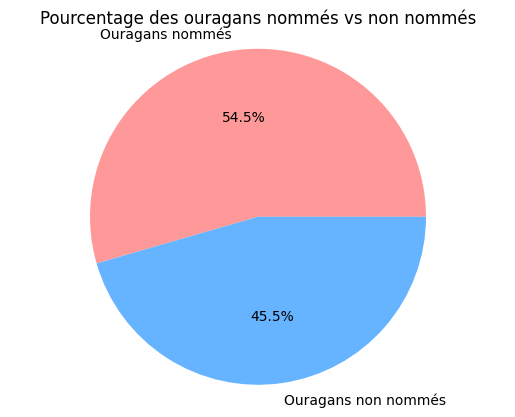

In [5]:
# Créer un camembert
labels = ['Ouragans nommés', 'Ouragans non nommés']
sizes = [num_hurricanes_names, num_hurricanes_not_names]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Pourcentage des ouragans nommés vs non nommés")
plt.axis('equal')

plt.show()

In [6]:
nb = getNumberOfHurricane(all_data)
nb_nommé = getNumberOfHurricane(hurricanes_names)


/Users/dimitriaigle/Library/CloudStorage/OneDrive-Personnel/Fouillole/M1/S2/HurricaneProjet/utils/separationOuragan.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hurricane_Date"] = pd.to_datetime(data["Hurricane_Date"])
/Users/dimitriaigle/Library/CloudStorage/OneDrive-Personnel/Fouillole/M1/S2/HurricaneProjet/utils/separationOuragan.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date_Diff"] = data["Hurricane_Date"].diff()


In [7]:
print(f"Ce fichier contient des information sur {nb} ouragans dont {nb_nommé} sont nommés")


Ce fichier contient des information sur 2500 ouragans dont 850 sont nommés


nous utiliserons uniquement les ouragans nommés pour la suite de l'analyse

In [8]:
all_ouragans = getSeparedHurricane(hurricanes_names)
print(type(all_ouragans))

<class 'list'>


/Users/dimitriaigle/Library/CloudStorage/OneDrive-Personnel/Fouillole/M1/S2/HurricaneProjet/utils/separationOuragan.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hurricane_Date"] = pd.to_datetime(data["Hurricane_Date"])
/Users/dimitriaigle/Library/CloudStorage/OneDrive-Personnel/Fouillole/M1/S2/HurricaneProjet/utils/separationOuragan.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date_Diff"] = data["Hurricane_Date"].diff()


/Users/dimitriaigle/Library/CloudStorage/OneDrive-Personnel/Fouillole/M1/S2/HurricaneProjet/utils/separationOuragan.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hurricane_Date"] = pd.to_datetime(data["Hurricane_Date"])
/Users/dimitriaigle/Library/CloudStorage/OneDrive-Personnel/Fouillole/M1/S2/HurricaneProjet/utils/separationOuragan.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date_Diff"] = data["Hurricane_Date"].diff()


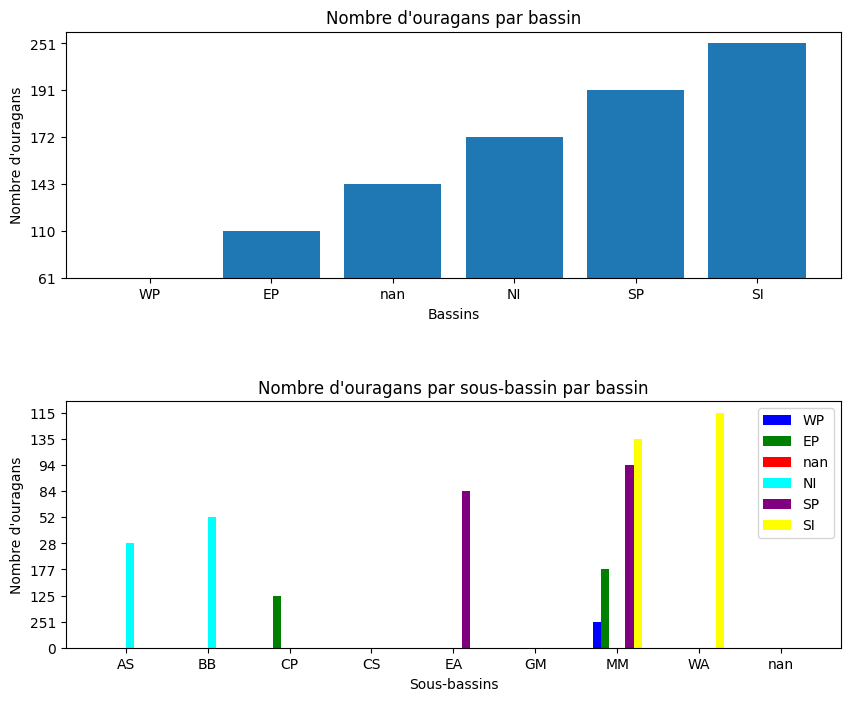

(0, 0, 0, 0, 0, 0, 135, 115, 0)


In [9]:
getAllGraphique(hurricanes_names)

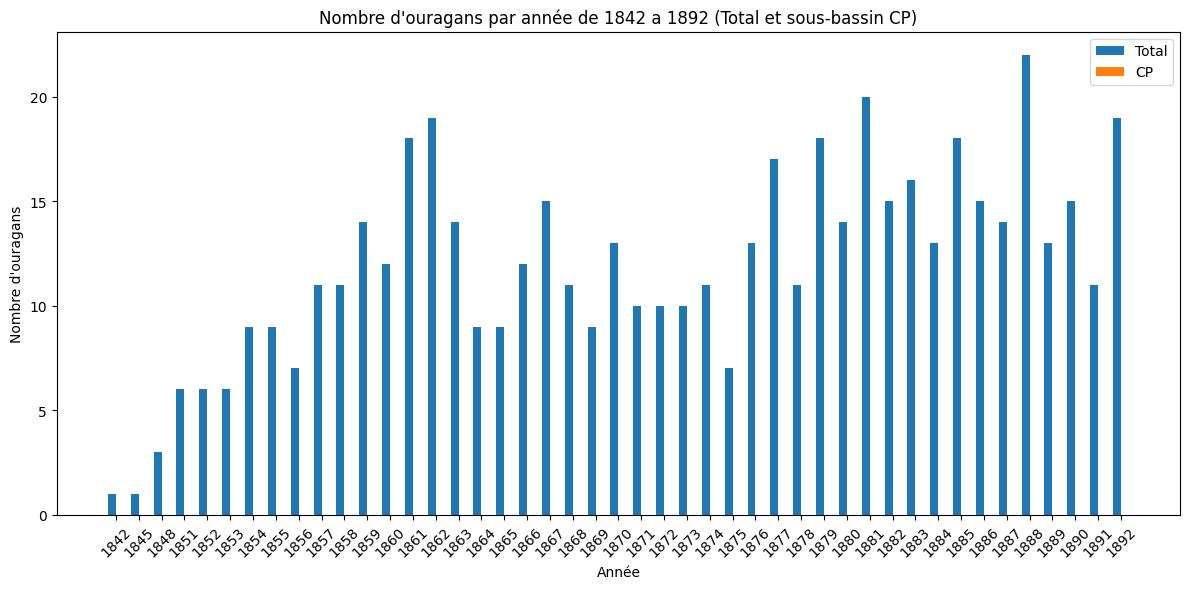


            Ouragans dans le monde entre 1842 et 2023 :
            pour un total de 2586 ouragans.

            -Année avec le plus d'ouragans : 1925
             Nombre d'ouragans : 24

            -Année avec le moins d'ouragans : 1845
             Nombre d'ouragans : 1

            -Avec en moyenne 14.69 ouragans par année.

            Ouragans dans le sous-bassin "CP" entre 1842 et 2023 :
            pour un total de 197 ouragans.

            -Année avec le plus d'ouragans : 1957
             Nombre d'ouragans : 7

            -Année avec le moins d'ouragans : 2022
             Nombre d'ouragans : 1

            -Avec en moyenne 2.63 ouragans par année.


            


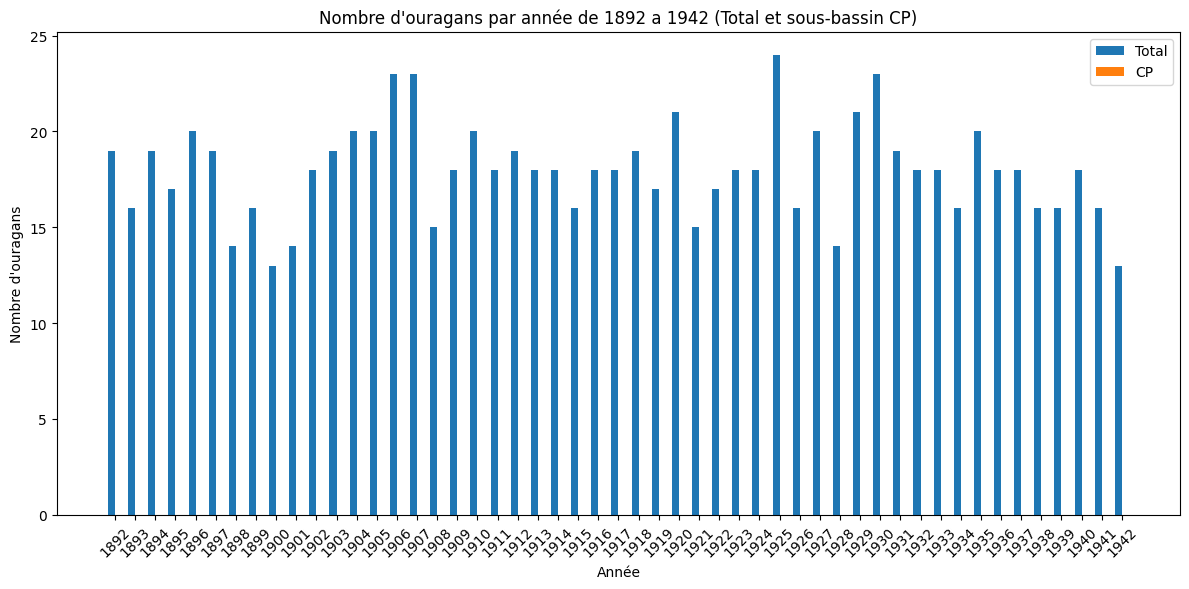


            Ouragans dans le monde entre 1842 et 2023 :
            pour un total de 2586 ouragans.

            -Année avec le plus d'ouragans : 1925
             Nombre d'ouragans : 24

            -Année avec le moins d'ouragans : 1845
             Nombre d'ouragans : 1

            -Avec en moyenne 14.69 ouragans par année.

            Ouragans dans le sous-bassin "CP" entre 1842 et 2023 :
            pour un total de 197 ouragans.

            -Année avec le plus d'ouragans : 1957
             Nombre d'ouragans : 7

            -Année avec le moins d'ouragans : 2022
             Nombre d'ouragans : 1

            -Avec en moyenne 2.63 ouragans par année.


            


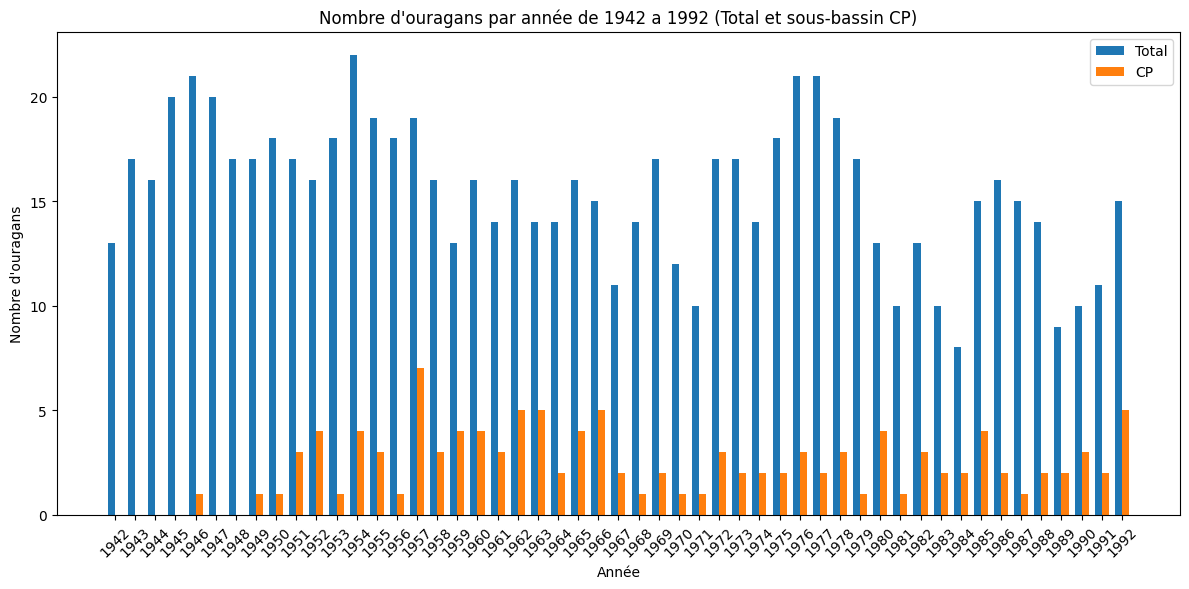


            Ouragans dans le monde entre 1842 et 2023 :
            pour un total de 2586 ouragans.

            -Année avec le plus d'ouragans : 1925
             Nombre d'ouragans : 24

            -Année avec le moins d'ouragans : 1845
             Nombre d'ouragans : 1

            -Avec en moyenne 14.69 ouragans par année.

            Ouragans dans le sous-bassin "CP" entre 1842 et 2023 :
            pour un total de 197 ouragans.

            -Année avec le plus d'ouragans : 1957
             Nombre d'ouragans : 7

            -Année avec le moins d'ouragans : 2022
             Nombre d'ouragans : 1

            -Avec en moyenne 2.63 ouragans par année.


            


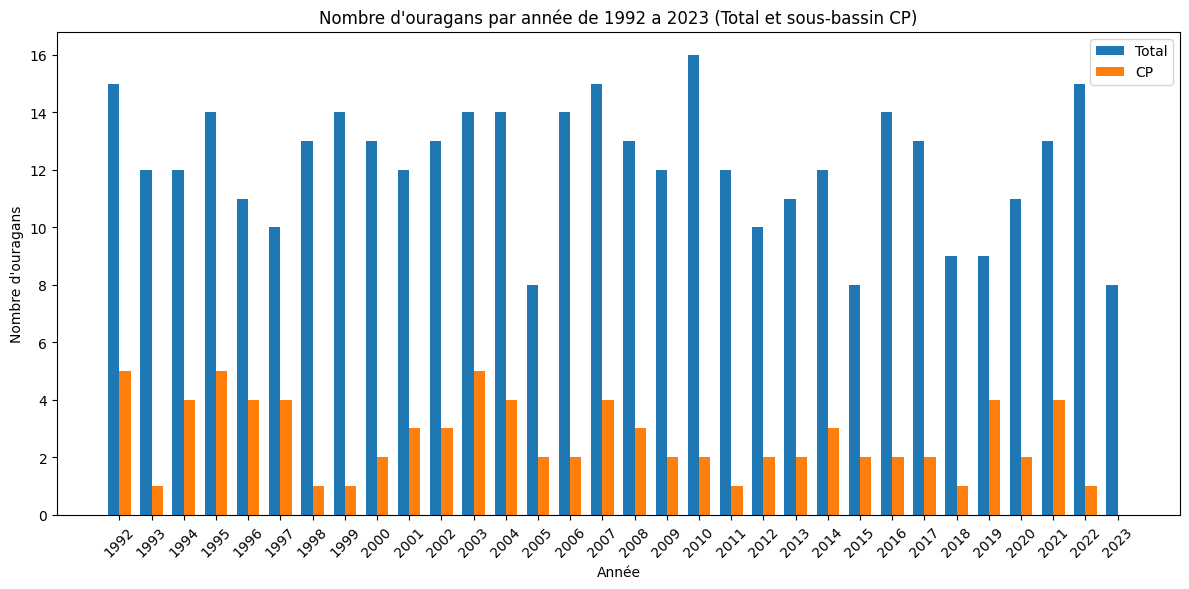


            Ouragans dans le monde entre 1842 et 2023 :
            pour un total de 2586 ouragans.

            -Année avec le plus d'ouragans : 1925
             Nombre d'ouragans : 24

            -Année avec le moins d'ouragans : 1845
             Nombre d'ouragans : 1

            -Avec en moyenne 14.69 ouragans par année.

            Ouragans dans le sous-bassin "CP" entre 1842 et 2023 :
            pour un total de 197 ouragans.

            -Année avec le plus d'ouragans : 1957
             Nombre d'ouragans : 7

            -Année avec le moins d'ouragans : 2022
             Nombre d'ouragans : 1

            -Avec en moyenne 2.63 ouragans par année.


            


In [10]:
getNumberHurricaneByYear(all_data)